In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from distfit import distfit

from utils import get_m_values, get_m_values_sparse

# Data

In [2]:
df = pd.read_csv('../data/pp_4l_all.csv')
cols_cont = [
    'E1', 'p1x', 'p1y', 'p1z', 
    'E2', 'p2x', 'p2y', 'p2z',
    'E3', 'p3x', 'p3y', 'p3z',
    'E4', 'p4x', 'p4y', 'p4z', 
]
cols_cat = ['pdg1', 'pdg2', 'pdg3', 'pdg4']

df['schema'] = df[cols_cat].groupby(by=cols_cat).ngroup().values

In [3]:
# All 4 particles concatenated
cols_concat = ['E', 'px', 'py', 'pz']
df_concat = pd.concat([
    df[cols_cont[0:4]].set_axis(cols_concat, axis=1),
    df[cols_cont[4:8]].set_axis(cols_concat, axis=1),
    df[cols_cont[8:12]].set_axis(cols_concat, axis=1),
    df[cols_cont[12:16]].set_axis(cols_concat, axis=1),
])

In [4]:
# Split by combination (3)
df_s0 = df[df['schema'] == 0]       # positron, electron, positron, electron
df_s1 = df[df['schema'] == 1]       # positron, electron, antimuon, muon
df_s2 = df[df['schema'] == 2]       # antimuon, muon, antimuon, muon

## Sparse representation

In [33]:
df = pd.read_csv('../data/pp_4l_all.csv')
cols_cont = [
    'E1', 'p1x', 'p1y', 'p1z', 
    'E2', 'p2x', 'p2y', 'p2z',
    'E3', 'p3x', 'p3y', 'p3z',
    'E4', 'p4x', 'p4y', 'p4z', 
]

# 8x4 columns in csv file, each 4-column group is E, px, py, pz for that particle:
cols_sparse = [
    'el1_neg_E', 'el1_neg_px', 'el1_neg_py', 'el1_neg_pz',  # Electron 1
    'el2_neg_E', 'el2_neg_px', 'el2_neg_py', 'el2_neg_pz',  # Electron 2
    'el1_pos_E', 'el1_pos_px', 'el1_pos_py', 'el1_pos_pz',  # Positron 1
    'el2_pos_E', 'el2_pos_px', 'el2_pos_py', 'el2_pos_pz',  # Positron 2
    'mu1_neg_E', 'mu1_neg_px', 'mu1_neg_py', 'mu1_neg_pz',  # Muon 1
    'mu2_neg_E', 'mu2_neg_px', 'mu2_neg_py', 'mu2_neg_pz',  # Muon 2
    'mu1_pos_E', 'mu1_pos_px', 'mu1_pos_py', 'mu1_pos_pz',  # Antimuon 1
    'mu2_pos_E', 'mu2_pos_px', 'mu2_pos_py', 'mu2_pos_pz',  # Antimuon 2
]
comb1 = [11, -11, 11, -11]  # positron, electron, positron, electron
comb2 = [11, -11, 13, -13]  # positron, electron, antimuon, muon
comb3 = [13, -13, 13, -13]  # antimuon, muon, antimuon, muon

part1 = cols_cont[0:4]
part2 = cols_cont[4:8]
part3 = cols_cont[8:12]
part4 = cols_cont[12:16]

rows_sparse = []
for idx, row in df.iterrows():
    row_sparse = np.zeros((len(cols_sparse),))
    particle_types = list(row[['pdg1', 'pdg2', 'pdg3', 'pdg4']])
    if particle_types == comb1:
        # positron, electron, positron, electron
        row_sparse[8:12] = row[part1]
        row_sparse[0:4] = row[part2]
        row_sparse[12:16] = row[part3]
        row_sparse[4:8] = row[part4]
    elif particle_types == comb2:
        # positron, electron, antimuon, muon
        row_sparse[8:12] = row[part1]
        row_sparse[0:4] = row[part2]
        row_sparse[24:28] = row[part3]
        row_sparse[16:20] = row[part4]
    elif particle_types == comb3:
        # antimuon, muon, antimuon, muon
        row_sparse[24:28] = row[part1]
        row_sparse[16:20] = row[part2]
        row_sparse[28:32] = row[part3]
        row_sparse[20:24] = row[part4]
    rows_sparse.append(row_sparse)

df_sparse = pd.DataFrame.from_records(rows_sparse, columns=cols_sparse)
df_sparse.to_csv('../data/pp_4l_all_sparse.csv', index=False)

In [6]:
df_sparse = pd.read_csv('../data/pp_4l_all_sparse.csv')
m_sparse = get_m_values_sparse(df_sparse)

# EDA

In [12]:
df.describe()

,pdg1,E1,p1x,p1y,p1z,pdg2,E2,p2x,p2y,p2z,...,E3,p3x,p3y,p3z,pdg4,E4,p4x,p4y,p4z,schema
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,11.501400,92.026018,0.137882,0.540947,0.719524,-11.501400,89.751420,0.448589,0.326282,0.555325,...,92.076970,0.103985,-0.562429,-0.074929,-12.501900,88.424338,-0.690455,-0.304799,0.044673,1.001650
std,0.866854,94.899017,40.635212,40.074580,119.235105,0.866854,90.179851,40.067157,40.170643,113.879099,...,92.878962,39.739273,40.125446,117.963942,0.864947,89.146176,40.520549,39.900796,111.945196,0.706946
min,11.000000,7.018661,-399.186272,-393.225768,-1293.368231,-13.000000,7.043638,-423.785445,-517.012897,-1831.784722,...,7.037481,-478.360347,-408.538889,-1253.532488,-13.000000,7.078452,-370.448925,-354.102017,-2146.567794,0.000000
25%,11.000000,37.220048,-22.148459,-22.182106,-39.501631,-13.000000,37.076628,-22.080252,-22.429531,-38.844895,...,37.498513,-22.293010,-22.944584,-40.701083,-13.000000,36.957061,-23.072730,-22.577663,-37.736741,1.000000
50%,11.000000,63.068953,0.508450,0.434488,0.553465,-11.000000,62.511080,0.185585,0.312641,-0.206234,...,63.357224,-0.024127,-0.381230,-0.065718,-13.000000,62.015986,-0.521907,-0.017068,0.888101,1.000000
75%,13.000000,112.572678,22.671266,22.516409,40.839075,-11.000000,109.973647,22.582910,22.564150,38.860843,...,111.943622,22.530744,22.085732,40.009204,-13.000000,107.861614,21.972113,22.189127,39.705635,2.000000
max,13.000000,2639.296406,396.733322,408.499874,2600.029493,-11.000000,1857.258284,429.002192,384.870128,1003.275039,...,1286.509337,395.143800,411.545170,1219.917803,-11.000000,2205.782370,503.374066,414.459732,1170.101911,2.000000


In [7]:
# e_sum_sq = np.power(df['E1'] + df['E2'] + df['E3'] + df['E4'], 2)
# x_sum_sq = np.power(df['p1x'] + df['p2x'] + df['p3x'] + df['p4x'], 2)
# y_sum_sq = np.power(df['p1y'] + df['p2y'] + df['p3y'] + df['p4y'], 2)
# z_sum_sq = np.power(df['p1z'] + df['p2z'] + df['p3z'] + df['p4z'], 2)
# m_values = np.sqrt(e_sum_sq - x_sum_sq - y_sum_sq - z_sum_sq)
m_values = get_m_values(df)

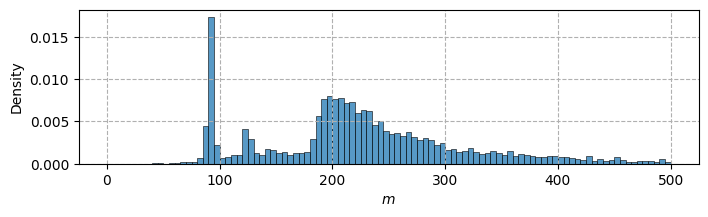

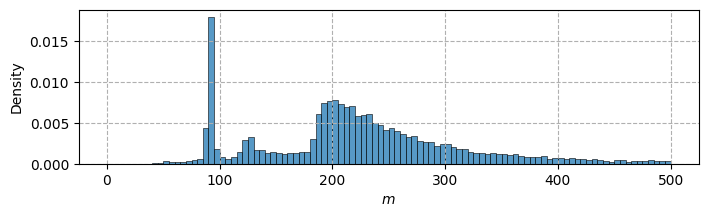

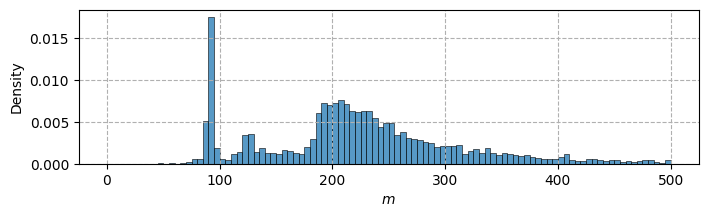

In [8]:
plt.figure(figsize=(8, 2), dpi=100)
sns.histplot(get_m_values(df_s0), bins=100, binrange=[0, 500], stat='density')
plt.xlabel('$m$')
plt.grid(linestyle='--')
# plt.savefig('images/m_hist_all.pdf', bbox_inches='tight', pad_inches=0.02)

plt.figure(figsize=(8, 2), dpi=100)
sns.histplot(get_m_values(df_s1), bins=100, binrange=[0, 500], stat='density')
plt.xlabel('$m$')
plt.grid(linestyle='--')

plt.figure(figsize=(8, 2), dpi=100)
sns.histplot(get_m_values(df_s2), bins=100, binrange=[0, 500], stat='density')
plt.xlabel('$m$')
plt.grid(linestyle='--')

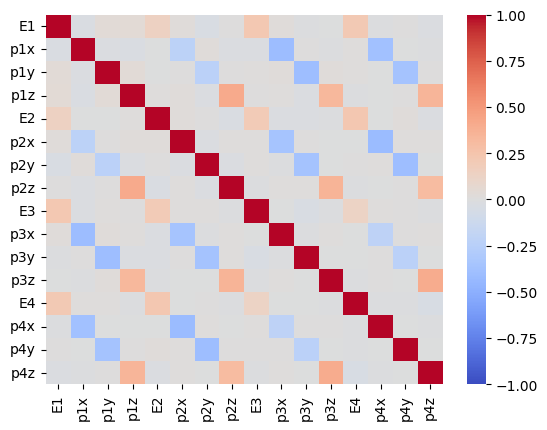

In [12]:
corr = df[cols_cont].corr()
plt.figure()
sns.heatmap(corr, vmin=-1, vmax=1, cmap='coolwarm')
plt.savefig('images/corr_all.pdf', bbox_inches='tight', pad_inches=0.02)

# np.sort(corr.to_numpy().flatten())

array([2.78627918e-01, 1.33278311e-01, 9.82797356e-02, 8.36154669e-02,
       7.49815303e-02, 7.32532071e-02, 7.12588793e-02, 5.83103417e-02,
       2.53514103e-02, 2.45063888e-02, 2.08698357e-02, 1.98569641e-02,
       1.89797266e-02, 1.88302847e-02, 2.71829479e-24, 2.65276475e-24])

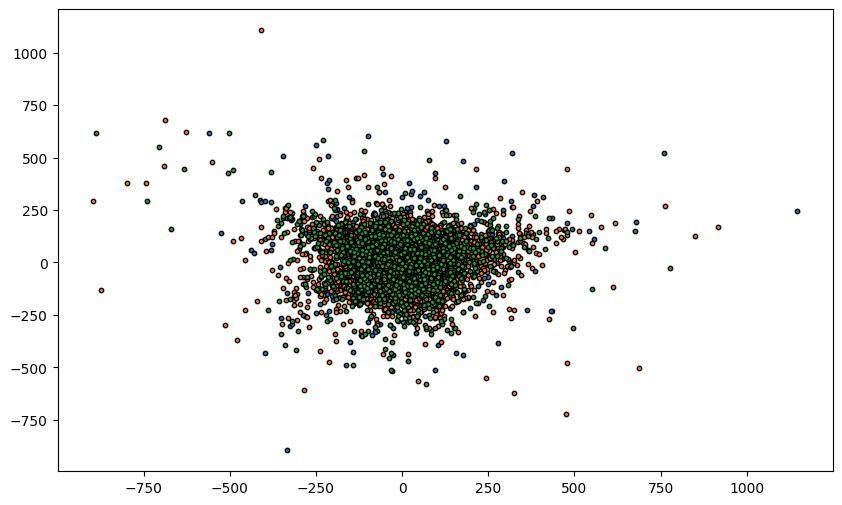

In [86]:
from sklearn.decomposition import PCA

pca = PCA()

X_pca = pca.fit_transform(df[cols_cont].values)

plt.figure(figsize=(10, 6))
for schema in range(3):
    plt.scatter(
        X_pca[df['schema'] == schema, 6], 
        X_pca[df['schema'] == schema, 7], 
        edgecolor='black', s=10)

pca.explained_variance_ratio_

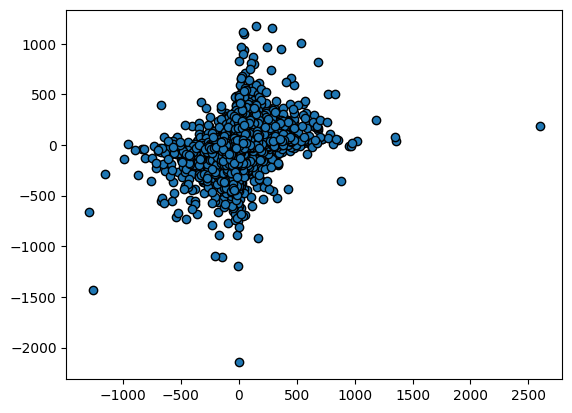

In [95]:
plt.scatter(df['p1z'], df['p4z'], edgecolor='black')

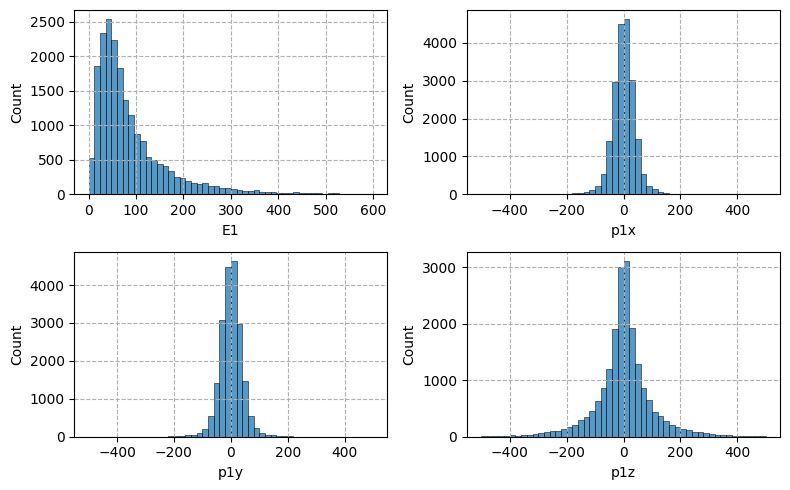

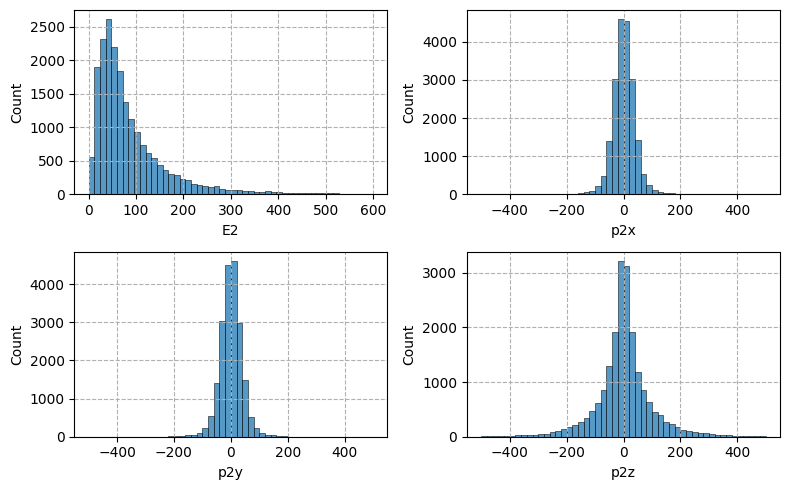

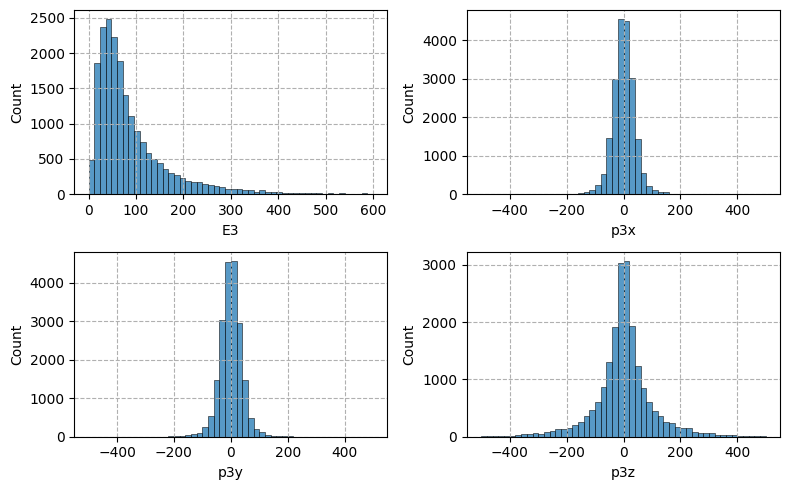

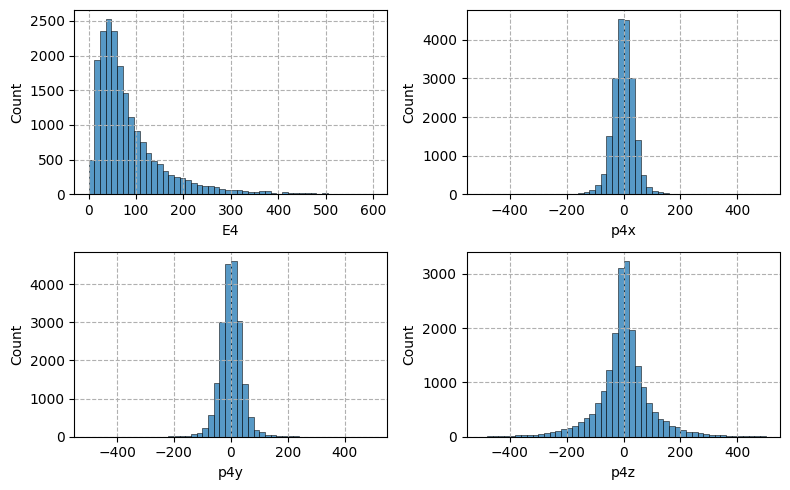

In [87]:
for i in range(1, 4+1):
    fig = plt.figure(figsize=(8, 5))
    plt.subplot(2, 2, 1)
    sns.histplot(df[f'E{i}'], bins=50, binrange=[0, 600])
    plt.grid(linestyle='--')

    plt.subplot(2, 2, 2)
    sns.histplot(df[f'p{i}x'], bins=50, binrange=[-500, 500])
    plt.grid(linestyle='--')

    plt.subplot(2, 2, 3)
    sns.histplot(df[f'p{i}y'], bins=50, binrange=[-500, 500])
    plt.grid(linestyle='--')

    plt.subplot(2, 2, 4)
    sns.histplot(df[f'p{i}z'], bins=50, binrange=[-500, 500])
    plt.grid(linestyle='--')

    fig.tight_layout()

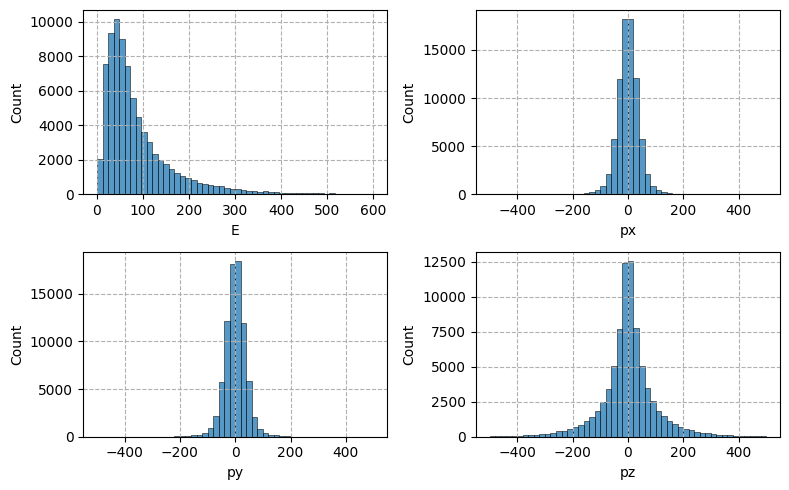

In [95]:
fig = plt.figure(figsize=(8, 5))


plt.subplot(2, 2, 1)
sns.histplot(df_concat['E'], bins=50, binrange=[0, 600])
plt.grid(linestyle='--')

plt.subplot(2, 2, 2)
sns.histplot(df_concat['px'], bins=50, binrange=[-500, 500])
plt.grid(linestyle='--')

plt.subplot(2, 2, 3)
sns.histplot(df_concat['py'], bins=50, binrange=[-500, 500])
plt.grid(linestyle='--')

plt.subplot(2, 2, 4)
sns.histplot(df_concat['pz'], bins=50, binrange=[-500, 500])
plt.grid(linestyle='--')

fig.tight_layout()

# Statistics

In [34]:
def fit_dists_and_plot(df, cols):
    fig = plt.figure(figsize=(8, 5))

    models = []
    for idx, col in enumerate(cols):
        # Assuming energy in 1st col
        if idx == 0:
            x_pdf = np.linspace(0, 600, 1000)
            binrange = [0, 600]
        else:
            x_pdf = np.linspace(-500, 500, 1000)
            binrange = [-500, 500]

        dist = distfit(bins=1000)
        res = dist.fit_transform(df[col], verbose=0)
        models.append(res['model']['model'])

        dist_str = f"{res['model']['name']}\n"
        dist_str += f"loc={res['model']['loc']:.3f}\nscale={res['model']['scale']:.3f}"
        if 'arg' in res['model']:
            dist_str += f"\narg={res['model']['arg'][0]:.3f}"

        plt.subplot(2, 2, idx + 1)
        ax = sns.histplot(df[col], bins=50, binrange=binrange, stat='density')
        ax.plot(x_pdf, res['model']['model'].pdf(x_pdf), 'r', label=dist_str)
        plt.legend(fontsize=8)
        plt.grid(linestyle='--')

    fig.tight_layout()
    return models

## Initial data

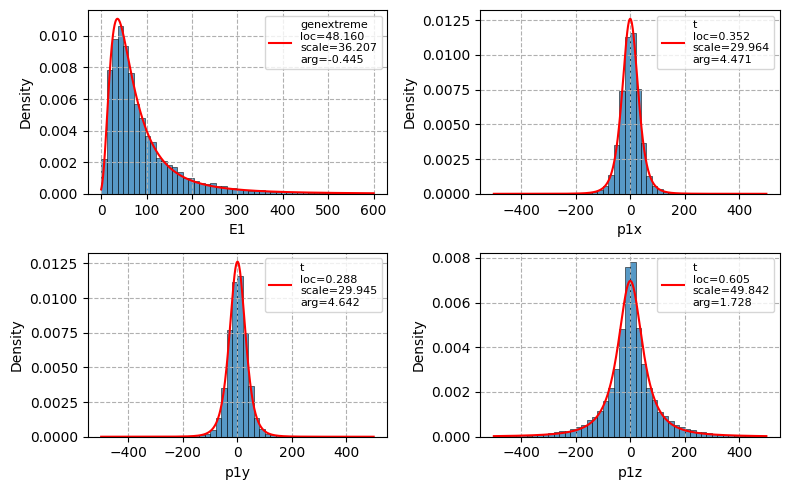

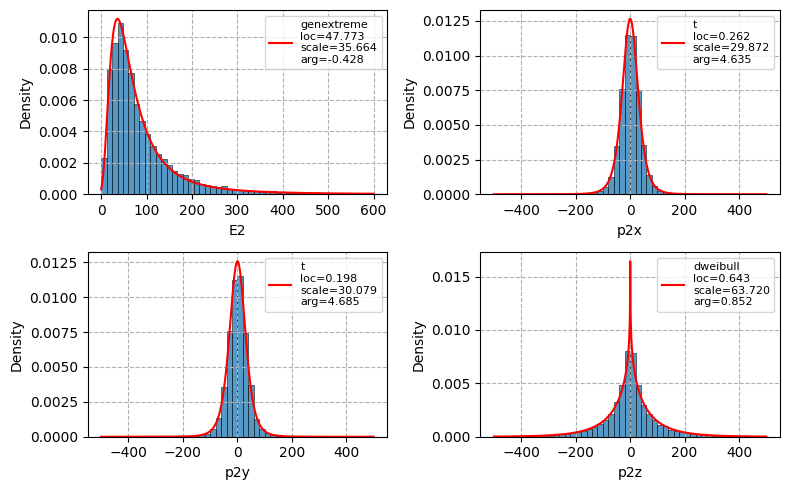

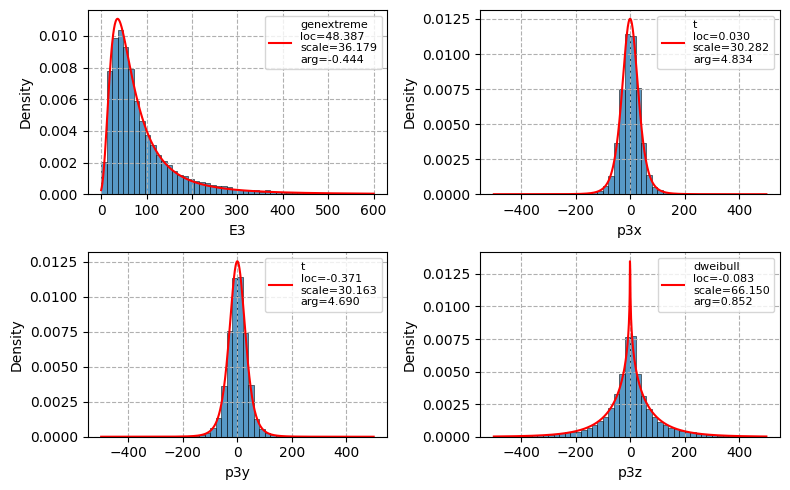

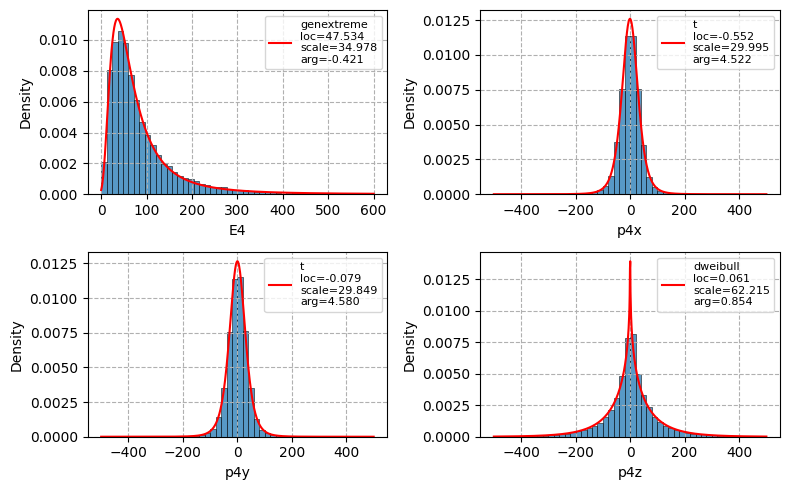

In [37]:
fit_dists_and_plot(df, ['E1', 'p1x', 'p1y', 'p1z'])
fit_dists_and_plot(df, ['E2', 'p2x', 'p2y', 'p2z'])
fit_dists_and_plot(df, ['E3', 'p3x', 'p3y', 'p3z'])
fit_dists_and_plot(df, ['E4', 'p4x', 'p4y', 'p4z'])

## Concatenated

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.000807506] [loc=90.570 scale=91.815]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.000209514] [loc=7.019 scale=83.551]
[distfit] >[pareto    ] [0.01 sec] [RSS: 0.000233517] [loc=-1472.745 scale=1479.763]
[distfit] >[dweibull  ] [0.47 sec] [RSS: 0.000326938] [loc=57.743 scale=49.541]
[distfit] >[t         ] [1.68 sec] [RSS: 0.000230755] [loc=60.366 scale=35.466]
[distfit] >[genextreme] [2.33 sec] [RSS: 2.29514e-05] [loc=47.957 scale=35.754]
[distfit] >[gamma     ] [0.50 sec] [RSS: 0.00246745] [loc=7.019 scale=4.059]
[distfit] >[lognorm   ] [1.13 sec] [RSS: 7.87792e-05] [loc=6.496 scale=54.460]
[distfit] >[beta      ] [1.02 sec] [RSS: 8.2583e-05] [loc=7.018 scale=5565138290.276]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.00228747] [loc=7.019 scale=2632.278]
[distfit] >[loggamma  ] [0.38 sec] [RSS: 0.0008498] [loc=-29656.728 scale=4017.107]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[

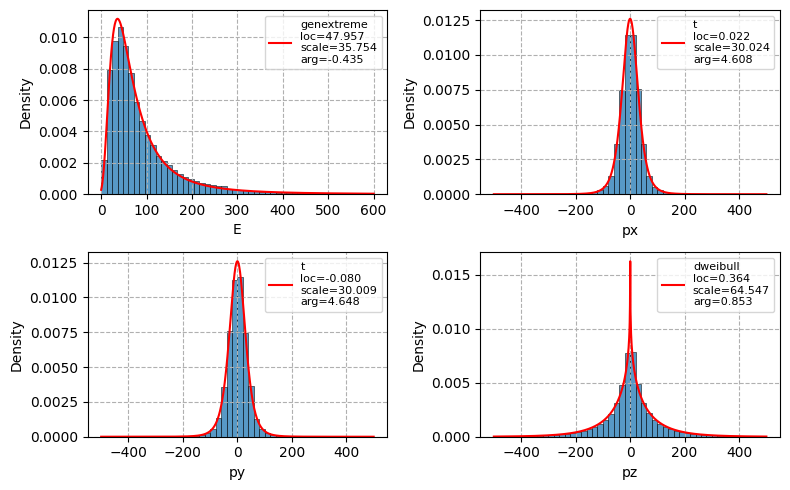

In [253]:
# Keturiu daleliu info sudeta i vienus stulpelius
models = fit_dists_and_plot(df_concat, ['E', 'px', 'py', 'pz'])

## By particle

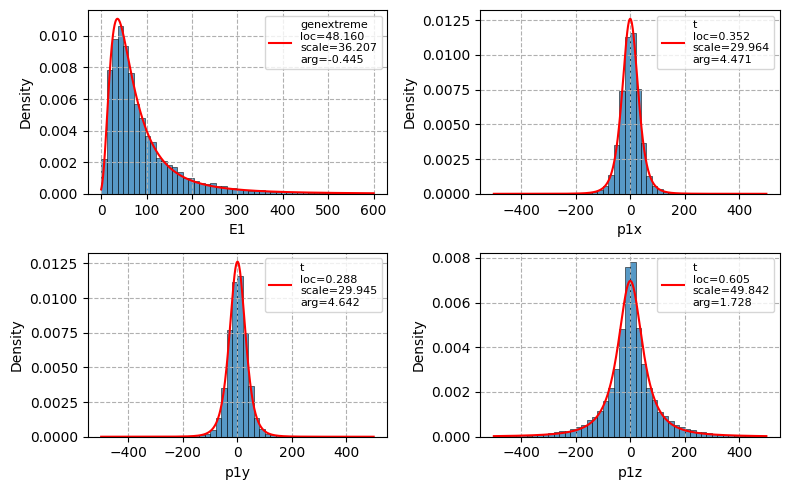

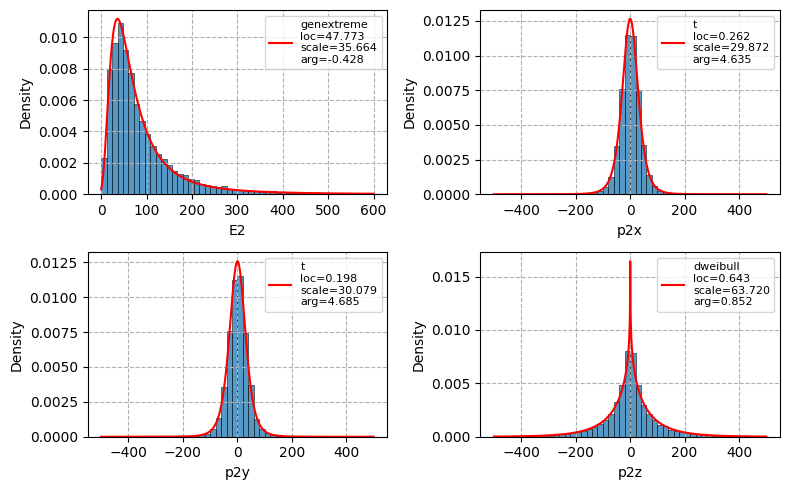

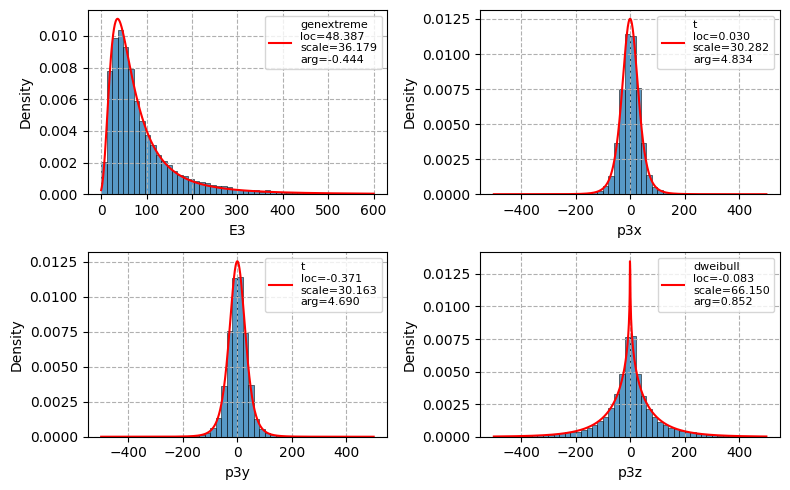

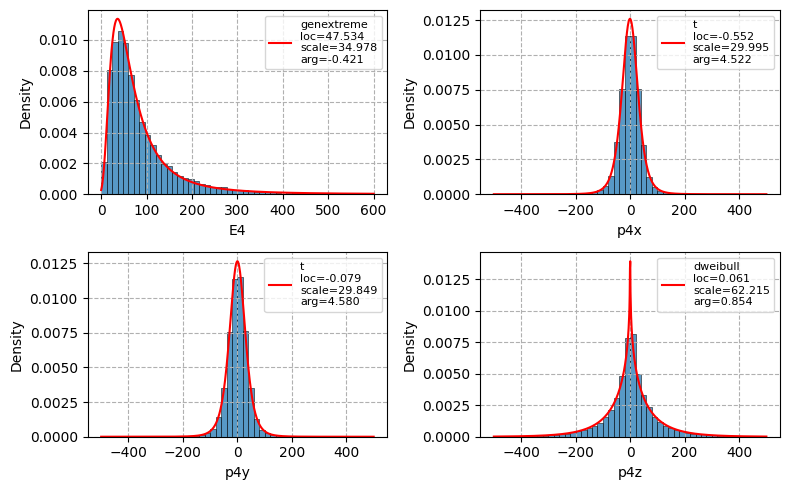

In [266]:
models_p1 = fit_dists_and_plot(df, ['E1', 'p1x', 'p1y', 'p1z'])
models_p2 = fit_dists_and_plot(df, ['E2', 'p2x', 'p2y', 'p2z'])
models_p3 = fit_dists_and_plot(df, ['E3', 'p3x', 'p3y', 'p3z'])
models_p4 = fit_dists_and_plot(df, ['E4', 'p4x', 'p4y', 'p4z'])

## By schema

In [ ]:
models_s1 = fit_dists_and_plot(df_s1, ['E', 'px', 'py', 'pz'])

<AxesSubplot: ylabel='Density'>

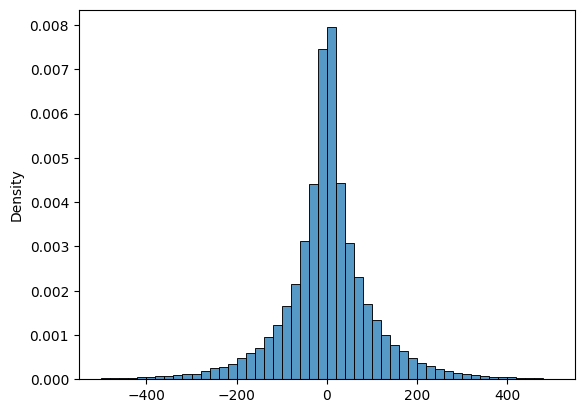

In [261]:
sns.histplot(res['model']['model'].rvs(80000), 
    bins=50, binrange=[-500, 500], stat='density')

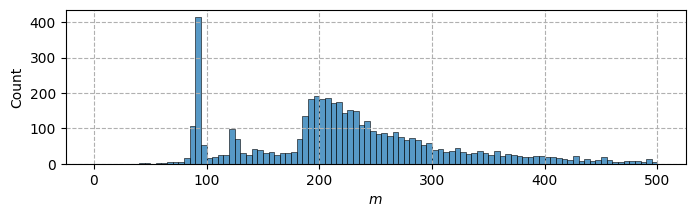

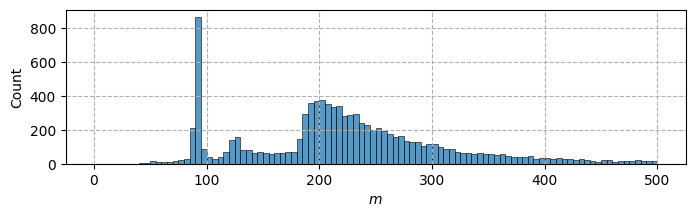

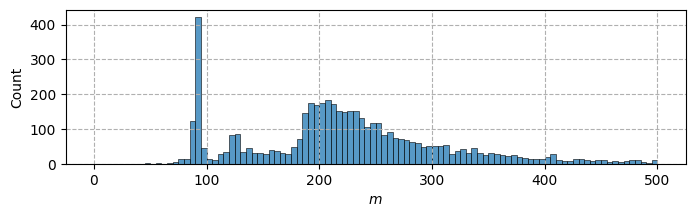

In [32]:
from scipy.stats import ks_2samp

m_values_s0 = get_m_values(df_s0)
m_values_s1 = get_m_values(df_s1)
m_values_s2 = get_m_values(df_s2)
m_values_s_all = [m_values_s0, m_values_s1, m_values_s2]

# KS tests
ks_p_values = np.zeros((3, 3))
for idx1, v1 in enumerate(m_values_s_all):
    for idx2, v2 in enumerate(m_values_s_all):
        ks_p_values[idx1, idx2] = ks_2samp(v1, v2)[1]

plt.figure(figsize=(8, 2), dpi=100)
sns.histplot(m_values_s0, bins=100, binrange=[0, 500])
plt.xlabel('$m$')
plt.grid(linestyle='--')

plt.figure(figsize=(8, 2), dpi=100)
sns.histplot(m_values_s1, bins=100, binrange=[0, 500])
plt.xlabel('$m$')
plt.grid(linestyle='--')

plt.figure(figsize=(8, 2), dpi=100)
sns.histplot(m_values_s2, bins=100, binrange=[0, 500])
plt.xlabel('$m$')
plt.grid(linestyle='--')

In [30]:
ks_2samp(v1, v2)[1]

1.0

## Sampling (simple)

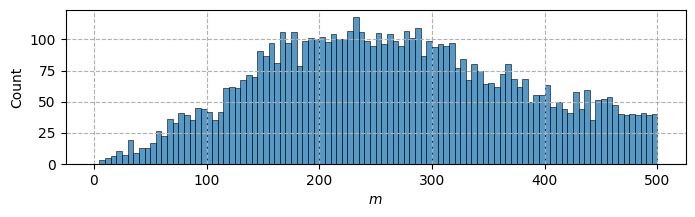

In [277]:
sample_count = 10000
models_p = [models_p1, models_p2, models_p3, models_p4]
_dfs = []
for idx, ms in enumerate(models_p):
    _df = pd.DataFrame.from_records({
        f'E{idx+1}': ms[0].rvs(sample_count),
        f'p{idx+1}x': ms[1].rvs(sample_count),
        f'p{idx+1}y': ms[2].rvs(sample_count),
        f'p{idx+1}z': ms[3].rvs(sample_count)
    })
    _dfs.append(_df)
df_sampled = pd.concat(_dfs, axis=1)

plt.figure(figsize=(8, 2), dpi=100)
# plt.hist(m_values, bins=100, range=(0, 500), edgecolor='black')
sns.histplot(get_m_values(df_sampled), bins=100, binrange=[0, 500])
plt.xlabel('$m$')
plt.grid(linestyle='--')

# Transforms

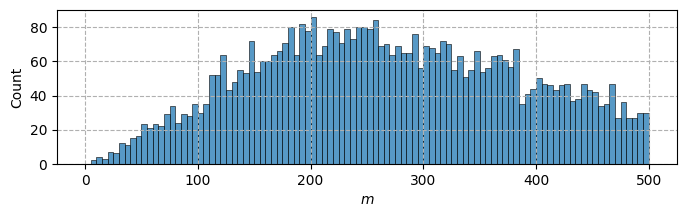

In [88]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from scipy.stats import multivariate_normal

# Transform into normal distributions
pt = PowerTransformer(method='yeo-johnson')
# pt = QuantileTransformer()
X_pt = pt.fit_transform(df[cols_cont].values)

# Gaussian mean/cov
X_pt_cov = np.cov(X_pt, rowvar=False)
X_pt_means = np.mean(X_pt, axis=0)

# Sample new data and transform back
X_pt_model = multivariate_normal(mean=X_pt_means, cov=X_pt_cov)
X_pt_sampled = X_pt_model.rvs(size=10000)
X_sampled = pt.inverse_transform(X_pt_sampled)

# Compare histograms
df_sampled = pd.DataFrame.from_records(X_sampled, columns=cols_cont)


plt.figure(figsize=(8, 2), dpi=100)
# plt.hist(m_values, bins=100, range=(0, 500), edgecolor='black')
sns.histplot(get_m_values(df_sampled), bins=100, binrange=[0, 500])
plt.xlabel('$m$')
plt.grid(linestyle='--')


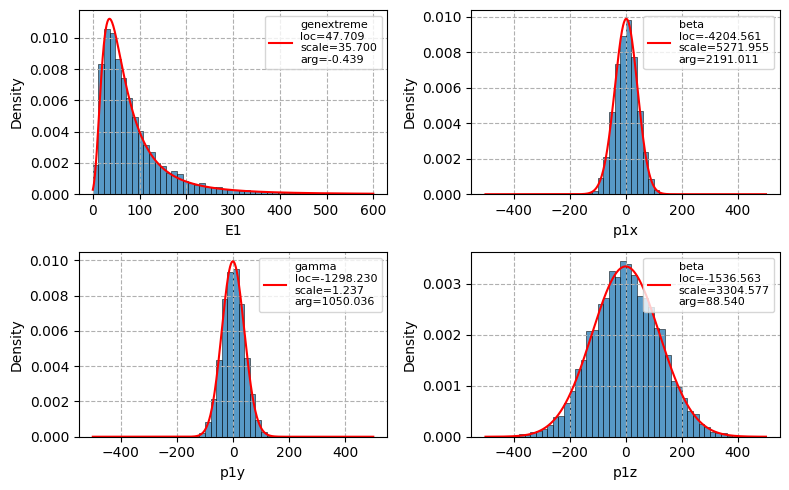

In [89]:
fit_dists_and_plot(df_sampled, ['E1', 'p1x', 'p1y', 'p1z'])

# Particle combinations

In [14]:
# eiles tvarka nesvarbi
df['schema'].value_counts()

1    10005
2     5014
0     4981
Name: schema, dtype: int64

In [9]:
df[df['schema'] == 2].iloc[0]

pdg1       13.000000
E1        152.820099
p1x        63.584427
p1y        18.996694
p1z      -137.659427
pdg2      -13.000000
E2        164.917905
p2x         4.471840
p2y        31.646155
p2z      -161.791309
pdg3       13.000000
E3        137.529487
p3x       -39.586901
p3y       -44.338982
p3z      -124.021291
pdg4      -13.000000
E4         39.559938
p4x       -28.469366
p4y        -6.303867
p4z       -26.734509
schema      2.000000
Name: 1, dtype: float64

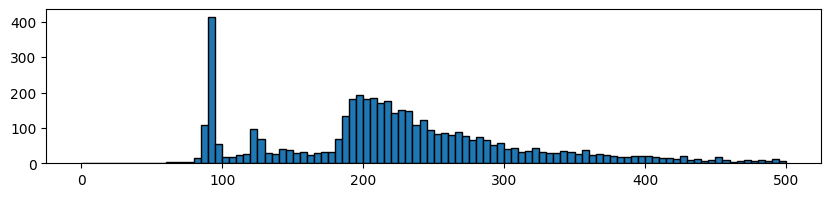

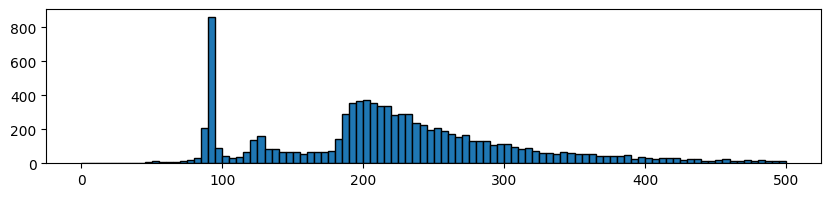

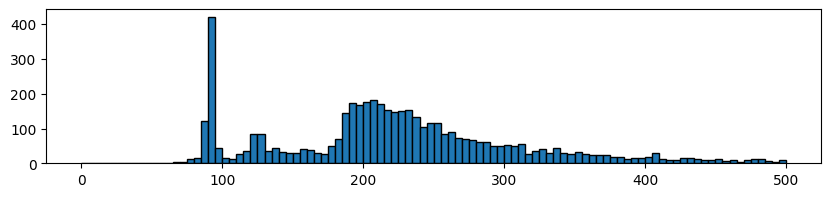

In [22]:
# Histograms by schemas
for schema in range(3):
    plt.figure(figsize=(10, 2))
    plt.hist(m_values[df['schema'] == schema], bins=100, range=(0, 500), edgecolor='black')
    plt.show()

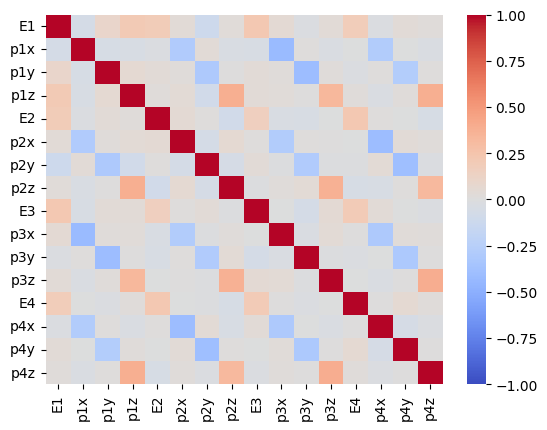

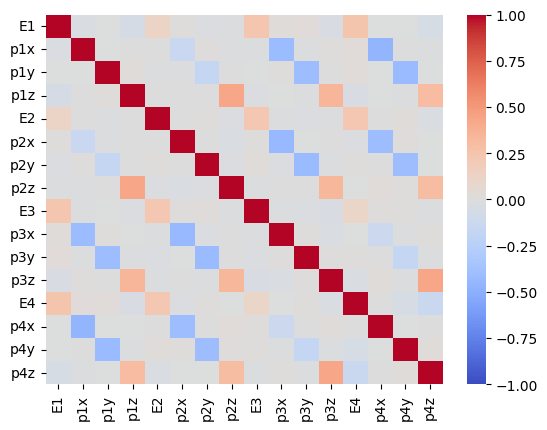

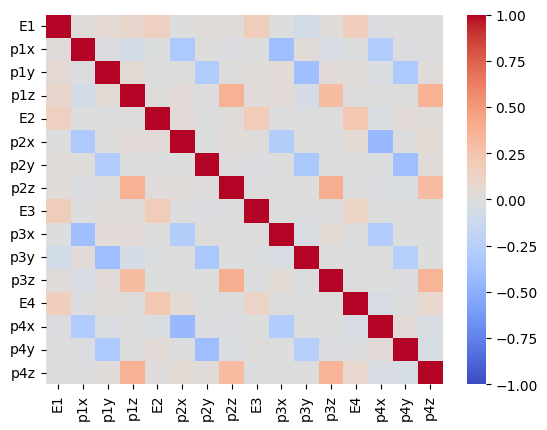

In [25]:
for schema in range(3):
    corr = df[df['schema'] == schema][cols_cont].corr()
    plt.figure()
    sns.heatmap(corr, vmin=-1, vmax=1, cmap='coolwarm')

In [33]:
df[cols_cont].corr()

,E1,p1x,p1y,p1z,E2,p2x,p2y,p2z,E3,p3x,p3y,p3z,E4,p4x,p4y,p4z
E1,1.000000,-0.025519,0.038528,0.046080,0.147036,0.016530,-0.031941,0.004488,0.219254,0.021867,-0.011827,-0.002915,0.213870,-0.012199,0.005354,-0.020167
p1x,-0.025519,1.000000,-0.018073,-0.025215,-0.003631,-0.222625,0.016528,-0.017663,-0.018014,-0.412613,0.005801,-0.009744,0.012223,-0.378038,-0.004322,-0.015271
p1y,0.038528,-0.018073,1.000000,0.037689,-0.001964,0.003036,-0.233987,0.006501,0.011261,0.020142,-0.405386,0.015923,0.013187,-0.004632,-0.361118,0.005680
p1z,0.046080,-0.025215,0.037689,1.000000,0.009783,0.019448,-0.021978,0.408186,0.004924,0.012936,-0.018435,0.331046,-0.010994,-0.006630,0.002812,0.346276
E2,0.147036,-0.003631,-0.001964,0.009783,1.000000,0.022135,0.004009,-0.025595,0.202750,-0.017546,-0.022113,-0.008136,0.228243,-0.001038,0.020174,-0.020616
p2x,0.016530,-0.222625,0.003036,0.019448,0.022135,1.000000,-0.016558,0.009717,0.010495,-0.356848,0.002225,-0.000637,-0.001066,-0.415588,0.011383,0.015239
p2y,-0.031941,0.016528,-0.233987,-0.021978,0.004009,-0.016558,1.000000,-0.020515,0.013053,-0.010828,-0.366205,-0.007244,0.004147,0.010417,-0.403490,-0.000743
p2z,0.004488,-0.017663,0.006501,0.408186,-0.025595,0.009717,-0.020515,1.000000,-0.009071,0.008594,0.012856,0.359349,-0.012568,-0.000323,0.001196,0.308721
E3,0.219254,-0.018014,0.011261,0.004924,0.202750,0.010495,0.013053,-0.009071,1.000000,-0.007245,-0.031746,-0.008140,0.131580,0.014793,0.007473,-0.010825
p3x,0.021867,-0.412613,0.020142,0.012936,-0.017546,-0.356848,-0.010828,0.008594,-0.007245,1.000000,-0.009714,0.008195,-0.002374,-0.214083,0.000440,0.011012


<AxesSubplot: ylabel='Count'>

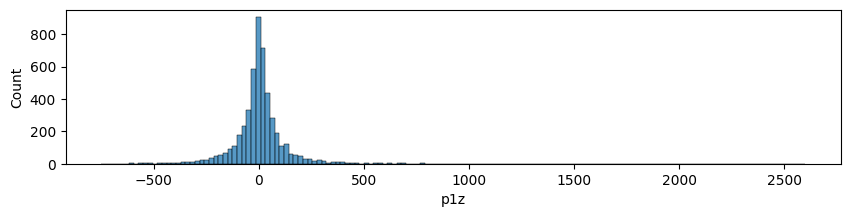

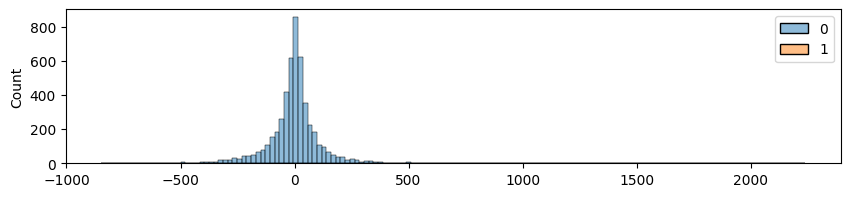

In [86]:
from scipy.stats import boxcox, yeojohnson

data = df[df['schema'] == 0]['p1z']

plt.figure(figsize=(10, 2))
sns.histplot(data, bins=150)

data_tf = yeojohnson(data)

plt.figure(figsize=(10, 2))
sns.histplot(data_tf, bins=150)

In [107]:
from scipy.stats import normaltest

normaltest(yeojohnson(df[df['schema'] == 0]['p2x'])[0])

NormaltestResult(statistic=743.3236723026978, pvalue=3.8843237963881047e-162)

In [120]:
normaltest(np.random.normal(0, 1, 100))

NormaltestResult(statistic=0.17580325724354465, pvalue=0.9158509658139172)

# Clustering

<AxesSubplot: ylabel='Count'>

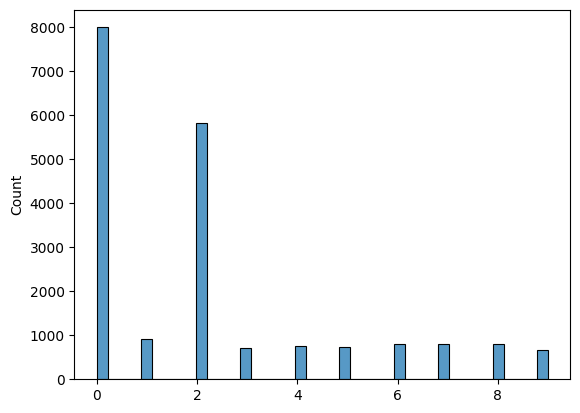

In [81]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)
y = kmeans.fit_predict(df[cols_cont].to_numpy())

sns.histplot(y)

<AxesSubplot: ylabel='Count'>

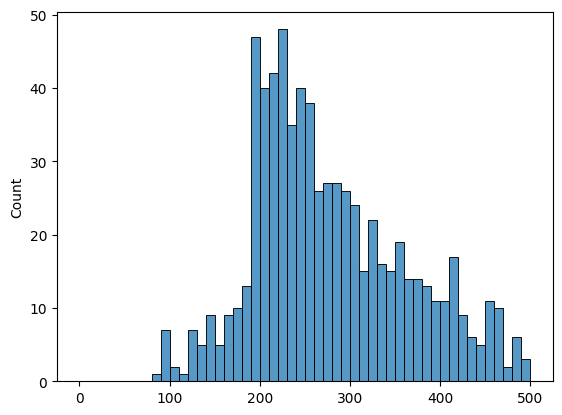

In [86]:
sns.histplot(m_values[y == 8], bins=50, binrange=(0, 500))